In [12]:
import numpy as np
from numpy import cos, sin
import matplotlib.pyplot as plt

hypot = lambda vec: np.sqrt( vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2] )
hypot(np.array([3,4,0]))

5.0

In [21]:



# Create the mesh in polar coordinates and compute corresponding Z.
N = 16
r = 2
theta = np.linspace(0, np.pi, N)
phi = np.linspace(0, 2*np.pi, N)

# meshgrid de los vetores
# ----
R = 2
R, Theta, Phi = np.meshgrid(r,theta, phi)
# _________
X = R * cos(Phi) * sin(Theta)
Y = R * sin(Phi) * sin(Theta)
Z = R * cos(Theta)

# meshgrid de las coordenadas:
x = np.linspace(.5, 5, N)
y = np.linspace(-5, 5, N)
z = np.linspace(-8, 8, N)
xv, yv, zv = np.meshgrid(x, y, z)



In [22]:
def rhat(rx, ry, rz):
    rvec = np.array([rx,ry,rz])
    r = hypot(rvec)
    # phi no se calculara por la simetria
    theta =  np.arctan2( np.hypot(rx,ry), rz)

    return rvec / r



r_field = np.vectorize(rhat, signature='(),(),()->(n)')(xv, yv, zv)
rx = r_field[:,:,:,0]
ry = r_field[:,:,:,1]
rz = r_field[:,:,:,2]

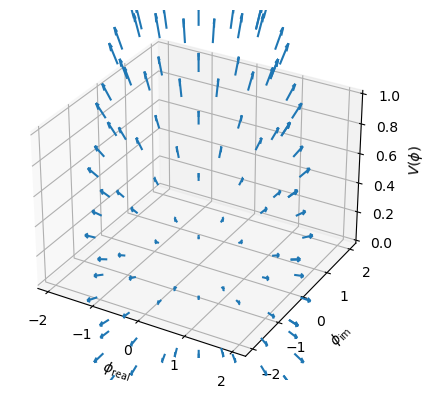

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


# Plot the surface.
ax.quiver(X, Y, Z, X,Y,Z, length=0.1,cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

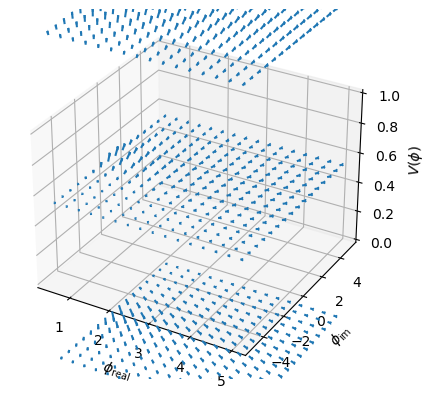

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


# Plot the surface.
ax.quiver(xv, yv, zv, rx,ry,rz, length=0.1,cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

# approach 2

In [25]:
# vectores
import numpy as np
# integracion mediante quad
import scipy as sp

import matplotlib.pyplot as plt
import sympy as smp
import plotly.graph_objects as go
from IPython.display import HTML

from mpl_toolkits.mplot3d import axes3d
%matplotlib inline


# calula la magnitud de r_vec para varios puntos
Rmag = lambda r: sp.spatial.distance.cdist(r, [[0,0,0]] )

hypot = lambda vec: np.sqrt( vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2] )
hypot(np.array([3,4,0]))

5.0

In [ ]:
def rhat(rx, ry, rz):
    rvec = np.array([rx,ry,rz])
    r = hypot(rvec)
    # phi no se calculara por la simetria
    theta =  np.arctan2( np.hypot(rx,ry), rz)

    return rvec / r

2 2 2


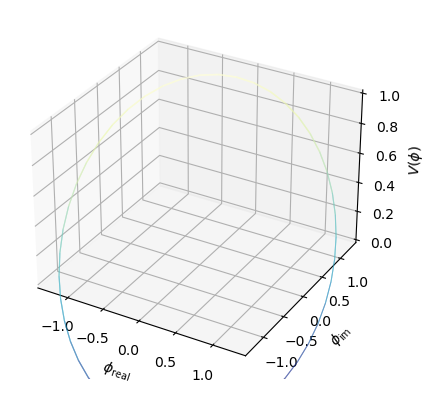

In [50]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
#y = np.linspace(-5, 5, 50)
#z = np.linspace(-5, 5, 50)
# Y, Z = np.meshgrid(y, z)


#primero cartesianas y luego al meshgrid de phi theta
r = np.linspace(1.24, 1.25, 5)
phi = np.linspace(0, 2*np.pi, 50)
R, Phi = np.meshgrid(r, phi)

# r = hypot(rvec)
# phi no se calculara por la simetria
# Theta =  np.arctan2( y, z)



# X es función deñ fenomeno
Z = R*np.sin(Phi) 

# Express the mesh in the cartesian system.
X, Y = R* np.cos(Phi), R*np.sin(Phi)

print(X.ndim, Y.ndim, Z.ndim)

# Plot the surface.
ax.plot_surface(Y, Z, X, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

In [41]:
Z.ndim

3

In [38]:

X.shape

(50, 50, 50)

In [26]:
# plotting del vector de poynting:
q = 1
d = 1
omega = 2*np.pi / 1 # 1 ciclo per seg


p0 = d * q

# esto resulta = pi, no habra problemas con la cantidad de digitos en esta multiplicacion
p0 * omega**2 / (4 * np.pi)



3.141592653589793

In [27]:

c = 1

def Sd(rx, ry, rz, t=2):
    rvec = np.array([rx,ry,rz])
    r = hypot(rvec)


    # phi no se calculara por la simetria
    theta =  np.arctan2( np.hypot(rx,ry), rz)

    I1 = np.sin(theta) / r
    I2 = np.cos( omega* (t - r/c) )

    return I1 * I1 * I2 * I2  * rvec / r


# notese que en el eje z es inexistente
r = np.array([0,0,5])
Sd(r[0], r[1], r[2])

array([0., 0., 0.])